In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
adult = pd.read_csv("adult_with_pii.csv")
adult.head()

,Name,DOB,SSN,Zip,Workclass,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Hours per week,Country,Target,Age,Capital Gain,Capital Loss
0,Karrie Trusslove,9/7/1967,732-14-6110,64152,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,56,2174,0
1,Brandise Tripony,6/7/1988,150-19-2766,61523,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K,35,0,0
2,Brenn McNeely,8/6/1991,725-59-9860,95668,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,32,0,0
3,Dorry Poter,4/6/2009,659-57-4974,25503,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,14,0,0
4,Dick Honnan,9/16/1951,220-93-3811,75387,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,72,0,0


In [3]:
domain = adult['Age'].dropna().unique()
print(domain)

[56 35 32 14 72 22 34 52 25 28 66 36 38 55 13 44 65 53 59 11 63 71 70 17
 30 69 39 40 20 18 37 27 49 68 93  1 12 62 24 50 67 45 48 51 16 41 23 58
 60 43 31 47 26 29 21 15 19 46 54 64 61 33 42 57 73]


In [4]:
def unary_epsilon(p, q):
    return np.log(p*(1-q)/((1-p)*q))

In [5]:
#encodes the response into a vector with binary entrances
def encode(response, domain):
    return [1 if d == response else 0 for d in domain]

In [6]:
#calls perturb_bit to each element on the vector orginated from the 
def perturb(encoded_response, p, q):
    return [perturb_bit(b, p, q) for b in encoded_response]

#this is the function that perturbs the bits of the vector
def perturb_bit(bit, p, q):
    #generates the chance of the bit
    sample = np.random.random()
    
    if bit == 1:
        if sample <= p:
            #truth
            return 1
        else:
            #lie
            return 0
    elif bit == 0:
        if sample <= q:
            #lie
            return 1
        else:
            #truth
            return 0

In [7]:
#Aggregation that takes into consideration the number of fake responses on each category
def aggregate(responses, p, q):
    sums = np.sum(responses, axis = 0)
    n = len(responses)

    return [(v-n*q)/(p-q) for v in sums]

In [8]:
domain = adult['Occupation'].dropna().unique()

p = 0.75
q = 0.25
responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
counts = aggregate(responses, p, q)
list(zip(domain,counts))

[('Adm-clerical', np.float64(3716.5)),
 ('Exec-managerial', np.float64(3900.5)),
 ('Handlers-cleaners', np.float64(1564.5)),
 ('Prof-specialty', np.float64(4088.5)),
 ('Other-service', np.float64(3238.5)),
 ('Sales', np.float64(3814.5)),
 ('Craft-repair', np.float64(4124.5)),
 ('Transport-moving', np.float64(1366.5)),
 ('Farming-fishing', np.float64(888.5)),
 ('Machine-op-inspct', np.float64(2018.5)),
 ('Tech-support', np.float64(842.5)),
 ('Protective-serv', np.float64(826.5)),
 ('Baby', np.float64(120.5)),
 ('Armed-Forces', np.float64(-23.5)),
 ('Priv-house-serv', np.float64(180.5))]

In [9]:
domain = adult['Occupation'].dropna().unique()

counts = np.sum([encode(r, domain) for r in adult['Occupation']], axis = 0)
list(zip(domain, counts))

[('Adm-clerical', np.int64(3770)),
 ('Exec-managerial', np.int64(4066)),
 ('Handlers-cleaners', np.int64(1370)),
 ('Prof-specialty', np.int64(4140)),
 ('Other-service', np.int64(3295)),
 ('Sales', np.int64(3650)),
 ('Craft-repair', np.int64(4100)),
 ('Transport-moving', np.int64(1597)),
 ('Farming-fishing', np.int64(994)),
 ('Machine-op-inspct', np.int64(2002)),
 ('Tech-support', np.int64(928)),
 ('Protective-serv', np.int64(649)),
 ('Baby', np.int64(1)),
 ('Armed-Forces', np.int64(9)),
 ('Priv-house-serv', np.int64(149))]

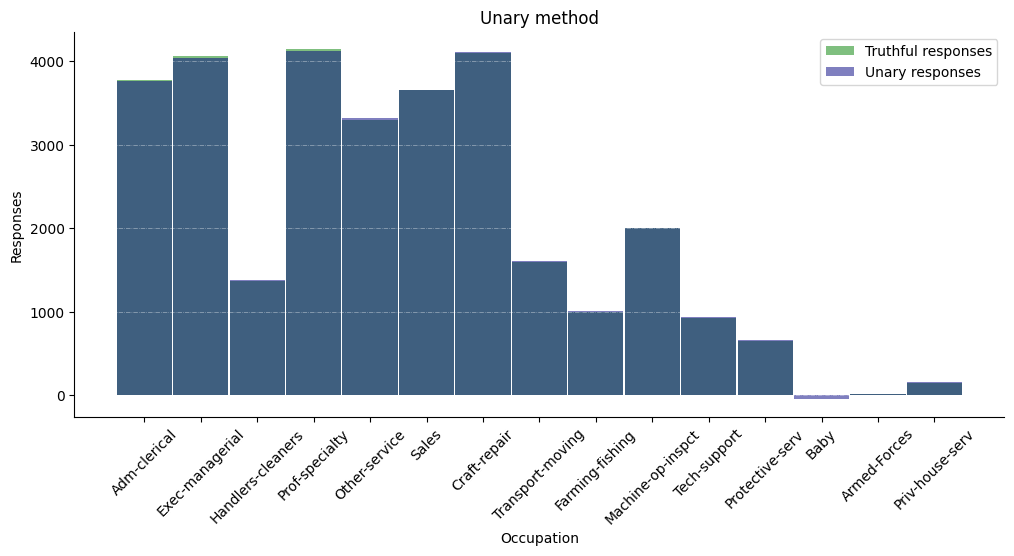

6.79234442747081


In [31]:
domain = adult['Occupation'].dropna().unique()

p = 0.9
q = 0.01
responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
countsUnary = aggregate(responses, p, q)

countsTruth = np.sum([encode(r, domain) for r in adult['Occupation']], axis = 0)

fig = plt.figure(figsize=(12, 5), facecolor='white')

plt.bar(domain, countsTruth, alpha=0.5, label='Truthful responses', align='center', color='green' , width = 0.98)
plt.bar(domain, countsUnary, alpha=0.5, label='Unary responses', align='center', color='navy',  width = 0.98)

plt.xlabel('Occupation')
plt.ylabel('Responses')
plt.title('Unary method')
plt.xticks(rotation=45)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.minorticks_off()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='white')

plt.savefig('histUnarytest.png', bbox_inches='tight', dpi=300)

plt.show()
print(unary_epsilon(p, q))

In [11]:
def pct_error(exact, approx):
    return abs((approx - exact) / exact) * 100

In [12]:
def mean_pct_error(exact, approx):
    n = len(exact)
    ag_error = 0

    for i in range(n):
        ag_error += ((exact[i] - approx[i])/exact[i])*100

    mean_error = ag_error/n
    return mean_error

In [13]:
domain = adult['Occupation'].dropna().unique()

p = 0.75 
q = 0.25
responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
countsUnary = aggregate(responses, p, q)

countsTruth = np.sum([encode(r, domain) for r in adult['Occupation']], axis=0)
err = mean_pct_error(countsTruth, countsUnary)

In [14]:
err

np.float64(562.3346295971677)

In [15]:
def rmse(exact, approx):
    n = len(exact)
    mse = 0

    for i in range(n):
        mse += (exact[i] - approx[i])**2

    rmse = sqrt(mse/n)
    return rmse

In [16]:
p = 1 
q = 0 
responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
countsUnary = aggregate(responses, p, q)

countsTruth = np.sum([encode(r, domain) for r in adult['Occupation']], axis=0)
err = rmse(countsTruth, countsUnary)

In [17]:
err

0.0

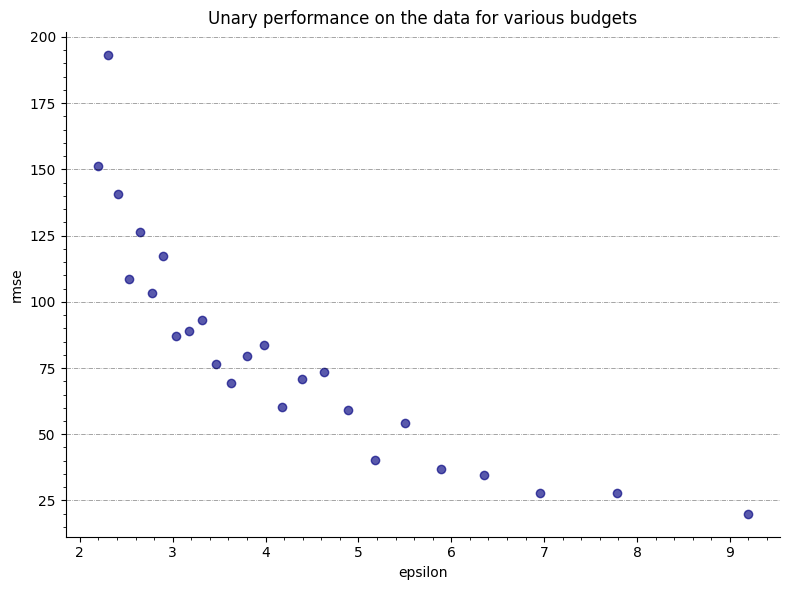

In [18]:
domain = adult['Occupation'].dropna().unique()

rmse_values = []
epsilon_values = []

domain = adult['Occupation'].dropna().unique()

for i in range(25):
    p = 0.75 + i/100
    q = 0.25 - i/100

    responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
    countsUnary = aggregate(responses, p, q)

    countsTruth = np.sum([encode(r, domain) for r in adult['Occupation']], axis=0)

    rmse_values.append(rmse(countsTruth, countsUnary))
    epsilon_values.append(unary_epsilon(p, q))

plt.figure(figsize=(8, 6))
plt.scatter(epsilon_values, rmse_values, marker='o', color='navy', alpha=0.65)
plt.title('Unary performance on the data for various budgets')
plt.xlabel('epsilon')
plt.ylabel('rmse')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)

plt.minorticks_on()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='black')

plt.tight_layout()
plt.show()


In [19]:
domain = adult['Occupation'].dropna().unique()

for i in range(25):
    p = 0.75 + i/100
    q = 0.25 - i/100

    responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
    countsUnary = aggregate(responses, p, q)

    countsTruth = np.sum([encode(r, domain) for r in adult['Occupation']], axis=0)

    print(rmse(countsTruth,countsUnary), " ", unary_epsilon(p, q))

157.37804802449418   2.1972245773362196
175.62857751134575   2.305359019876771
144.25779512403042   2.4166224118490685
140.1568384730062   2.531332746662552
136.70047098434017   2.6498508294871974
96.07894130850381   2.7725887222397816
91.3941814887012   2.9000203510119973
114.92248491510465   3.0326949787361777
96.70507952469194   3.1712545274807638
76.48079419073868   3.3164561532070644
106.43752439172684   3.4692021107762128
127.47876911107232   3.630579933276498
115.31345911020128   3.801917522386094
77.51636767559307   3.984860329380412
87.08600612780273   4.181482193867539
58.27920405256072   4.394449154672439
69.40131271827391   4.627269858361262
51.785392080734795   4.884694070738409
72.04587499280822   5.173378688195884
39.00995096260302   5.503070626083897
54.70189883930455   5.8888779583328805
32.66316609974809   6.35610766069589
25.354017202812404   6.952197379670546
29.327674150276717   7.783640596221253
21.140710992117953   9.190239700269178


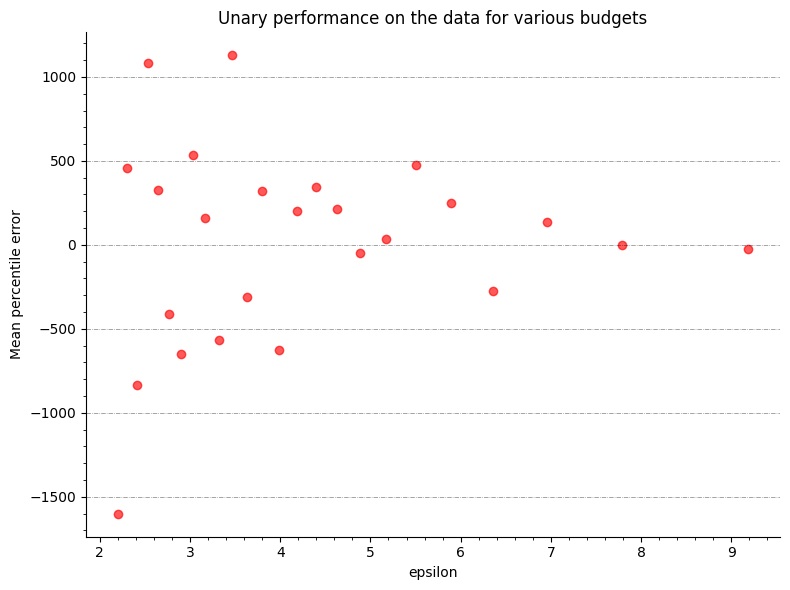

In [20]:
domain = adult['Occupation'].dropna().unique()

mean_error_values = []
epsilon_values = []

for i in range(25):
    p = 0.75 + i/100
    q = 0.25 - i/100

    responses = [perturb(encode(r, domain), p, q) for r in adult['Occupation']]
    countsUnary = aggregate(responses, p, q)

    countsTruth = np.sum([encode(r, domain) for r in adult['Occupation']], axis=0)

    mean_error_values.append(mean_pct_error(countsTruth, countsUnary))
    epsilon_values.append(unary_epsilon(p, q))

plt.figure(figsize=(8, 6))
plt.scatter(epsilon_values, mean_error_values, marker='o', color='red', alpha=0.65)
plt.title('Unary performance on the data for various budgets')
plt.xlabel('epsilon')
plt.ylabel('Mean percentile error')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)

plt.minorticks_on()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='black')

plt.tight_layout()
plt.show()


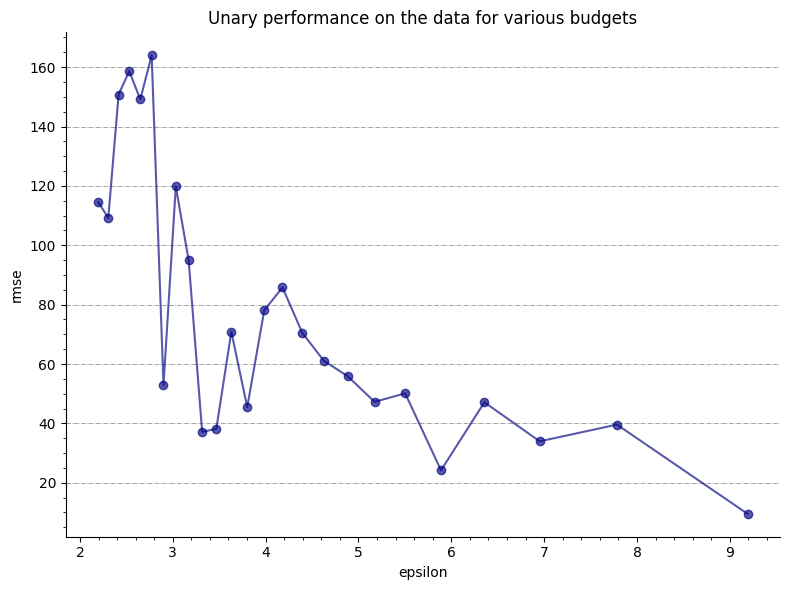

In [21]:
domain = adult['Race'].dropna().unique()

rmse_values = []
epsilon_values = []

for i in range(25):
    p = 0.75 + i/100
    q = 0.25 - i/100

    responses = [perturb(encode(r, domain), p, q) for r in adult['Race']]
    countsUnary = aggregate(responses, p, q)

    countsTruth = np.sum([encode(r, domain) for r in adult['Race']], axis=0)

    rmse_values.append(rmse(countsTruth, countsUnary))
    epsilon_values.append(unary_epsilon(p, q))

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, rmse_values, marker='o', color='navy', alpha=0.65)
plt.title('Unary performance on the data for various budgets')
plt.xlabel('epsilon')
plt.ylabel('rmse')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)

plt.minorticks_on()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='black')

plt.tight_layout()
plt.show()


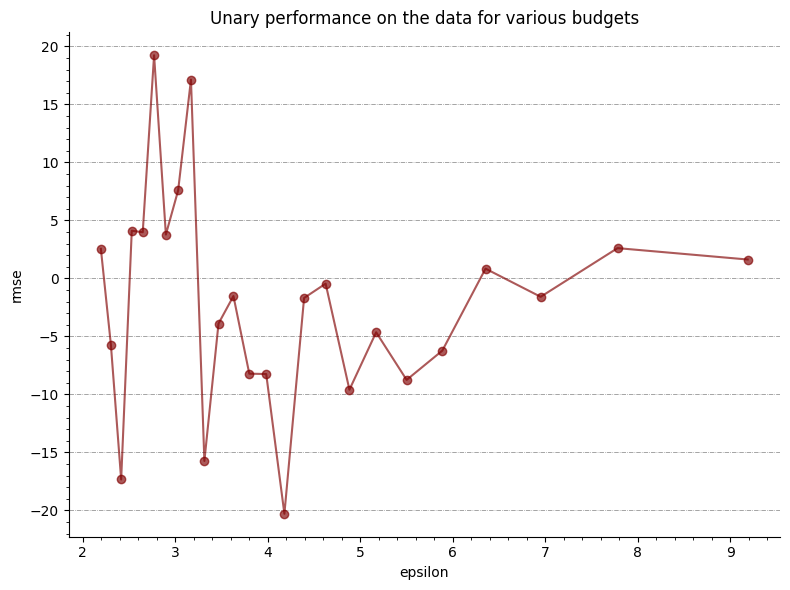

In [22]:
domain = adult['Race'].dropna().unique()

mean_error_values = []
epsilon_values = []

for i in range(25):
    p = 0.75 + i/100
    q = 0.25 - i/100

    responses = [perturb(encode(r, domain), p, q) for r in adult['Race']]
    countsUnary = aggregate(responses, p, q)

    countsTruth = np.sum([encode(r, domain) for r in adult['Race']], axis=0)

    mean_error_values.append(mean_pct_error(countsTruth, countsUnary))
    epsilon_values.append(unary_epsilon(p, q))

plt.figure(figsize=(8, 6))
plt.plot(epsilon_values, mean_error_values, marker='o', color='maroon', alpha=0.65)
plt.title('Unary performance on the data for various budgets')
plt.xlabel('epsilon')
plt.ylabel('rmse')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)

plt.minorticks_on()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='black')

plt.tight_layout()
plt.show()


['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
[np.float64(27798.5), np.float64(3202.5), np.float64(824.5), np.float64(118.5), np.float64(376.5)]
[27818  3124  1039   311   271]


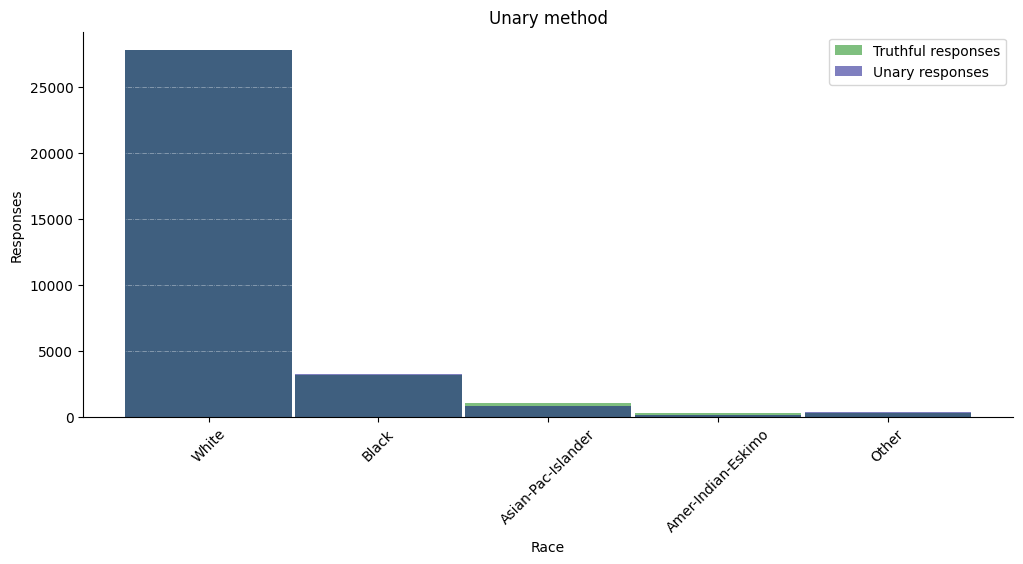

In [23]:
domain = adult['Race'].dropna().unique()
print(domain)

p = 0.75
q = 0.25
responses = [perturb(encode(r, domain), p, q) for r in adult['Race']]
countsUnary = aggregate(responses, p, q)
print(countsUnary)

countsTruth = np.sum([encode(r, domain) for r in adult['Race']], axis = 0)
print(countsTruth)

fig = plt.figure(figsize=(12, 5), facecolor='white')

plt.bar(domain, countsTruth, alpha=0.5, label='Truthful responses', align='center', color='green' , width = 0.98)
plt.bar(domain, countsUnary, alpha=0.5, label='Unary responses', align='center', color='navy',  width = 0.98)

plt.xlabel('Race')
plt.ylabel('Responses')
plt.title('Unary method')
plt.xticks(rotation=45)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.minorticks_off()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='white')

plt.savefig('histUnary2test.png', bbox_inches='tight', dpi=300)

plt.show()

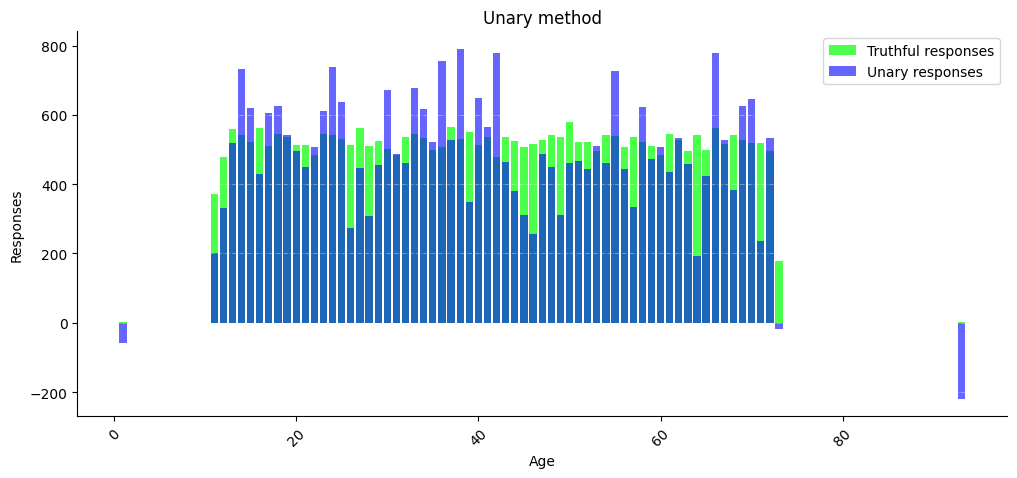

In [24]:
domain = adult['Age'].dropna().unique()

p = 0.75
q = 0.25
responses = [perturb(encode(r, domain), p, q) for r in adult['Age']]
countsUnary = aggregate(responses, p, q)

countsTruth = np.sum([encode(r, domain) for r in adult['Age']], axis = 0)

fig = plt.figure(figsize=(12, 5), facecolor='white')

plt.bar(domain, countsTruth, alpha=0.7, label='Truthful responses', align='center', color='lime' , width = 0.8)
plt.bar(domain, countsUnary, alpha=0.6, label='Unary responses', align='center', color='blue',  width = 0.8)

plt.xlabel('Age')
plt.ylabel('Responses')
plt.title('Unary method')
plt.xticks(rotation=45)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.minorticks_off()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='white')

plt.savefig('histUnarytest3.png', bbox_inches='tight', dpi=300)

plt.show()

In [25]:
#encodes the response into a vector with binary entrances, custom bin for a numeric variable
def encode_custom_bins(response, domain):
    
    encoded_vector = [0] * len(domain)
    
    for i, d in enumerate(domain):
        if i < len(domain) - 1:
            if response >= d and response < domain[i + 1]:
                encoded_vector[i] = 1
                break
        else:
            if response >= d:
                encoded_vector[i] = 1
                break
                
    return encoded_vector

In [26]:
domain = np.arange(0, 91, 5)
print("00 WOW ",domain)

real_responses = adult['Age']

fake_responses = [encode_custom_bins(r, domain) for r in adult['Age']]


for i in range(5):
    print(real_responses[i], "WOW", fake_responses[i])


00 WOW  [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90]
56 WOW [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
35 WOW [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
32 WOW [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
14 WOW [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
72 WOW [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


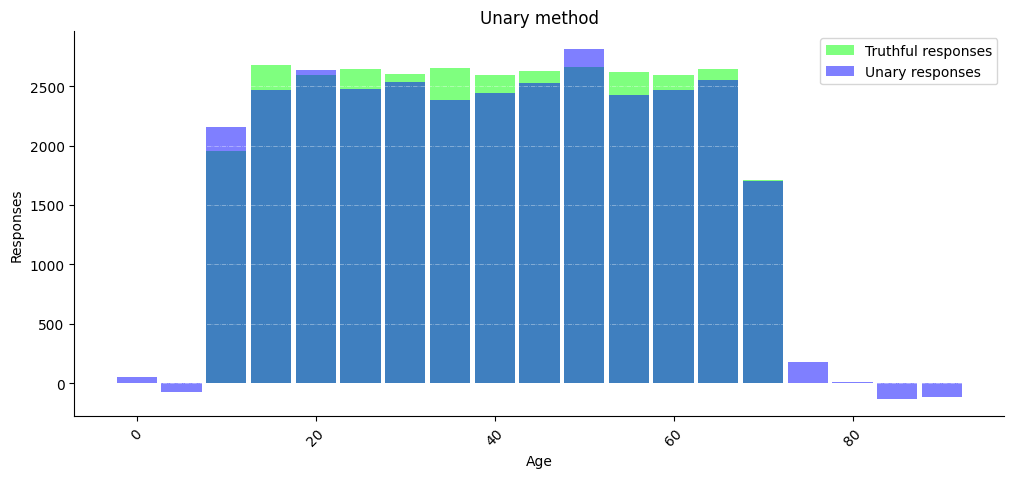

In [27]:
domain = np.arange(0, 91, 5)

p = 0.75
q = 0.25
responses = [perturb(encode_custom_bins(r, domain), p, q) for r in adult['Age']]
countsUnary = aggregate(responses, p, q)

countsTruth = np.sum([encode_custom_bins(r, domain) for r in adult['Age']], axis = 0)

fig = plt.figure(figsize=(12, 5), facecolor='white')

plt.bar(domain, countsTruth, alpha=0.5, label='Truthful responses', align='center', color='lime' , width = 4.5)
plt.bar(domain, countsUnary, alpha=0.5, label='Unary responses', align='center', color='blue',  width = 4.5)

plt.xlabel('Age')
plt.ylabel('Responses')
plt.title('Unary method')
plt.xticks(rotation=45)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#plt.gca().spines['bottom'].set_visible(False)
#plt.gca().spines['left'].set_visible(False)
plt.minorticks_off()
#plt.grid(True, linestyle='-', linewidth=0.5, alpha=0.5, color = 'black', which = 'both')
plt.grid(axis='y', linestyle='-.', linewidth=0.5, alpha=0.5, color='white')

plt.savefig('histUnarytest3.png', bbox_inches='tight', dpi=300)

plt.show()